For immersion: https://www.youtube.com/watch?v=sdBrscwwy_c

# 🌟 Operation NeuroNexus

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. You and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model.
4. After completing each task, you must answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
# Import your implementation
from linear_regression import LinearRegression # <--- This is your implementation

In [ ]:
# Load data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

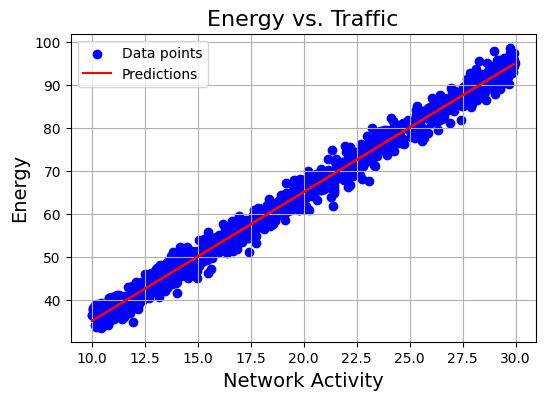

82483  iterations
a:
Parameters: beta0 =  4.882351169383148 , beta1 =  3.009128344397465
Energy =  4.882351169383148  +  3.009128344397465  * Network Activity


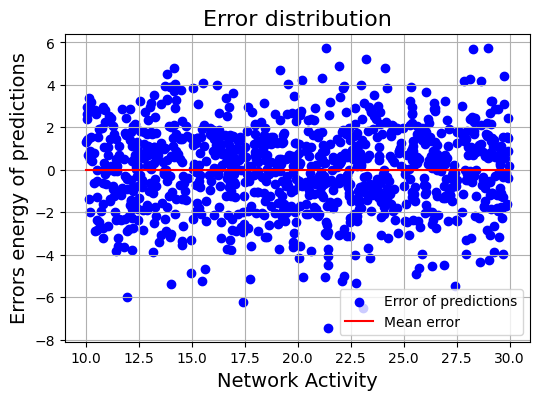


b:
An unbiased estimator is when the mean of the errors is close to zero. Here the mean is  0.000706299645954509 , which is quite close to zero. This means that the expected value of the estimator is equal to the true value of the set.


In [5]:
lr = LinearRegression()

lr.fit(data['Net_Activity'], data['Energy'])

pred = lr.predict(data['Net_Activity'])

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.plot(data['Net_Activity'], pred, color='red', label='Predictions')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()
print(lr.num_iterations, " iterations")

print("a:")
print("Parameters: beta0 = ", lr.beta0, ", beta1 = ", lr.beta1)
print("Energy = ", lr.beta0, " + ", lr.beta1, " * Network Activity")

errors = data['Energy'] - pred
mean = np.mean(errors)

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], errors, c='blue', label='Error of predictions')
plt.plot(np.linspace(data['Net_Activity'].min(), data['Net_Activity'].max(), 2), [mean, mean], color='red', label='Mean error')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Errors energy of predictions', fontsize=14)
plt.title('Error distribution', fontsize=16)
plt.legend()
plt.show()

print("\nb:")
print("An unbiased estimator is when the mean of the errors is close to zero. Here the mean is ", mean, ", which is quite close to zero. This means that the expected value of the estimator is equal to the true value of the set.")


## 🧠 Mission 2: Decoding SkyNet's signals

### 🌐 The Discovery
We've intercepted two types of signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

Best threshold single feature (x0*x1): 0.5105105105105106
Best accuracy single feature (x0*x1): 0.95
Best threshold three features (x0, x1, x0*x1): 0.5055055055055055
Best accuracy three features (x0, x1, x0*x1): 0.904


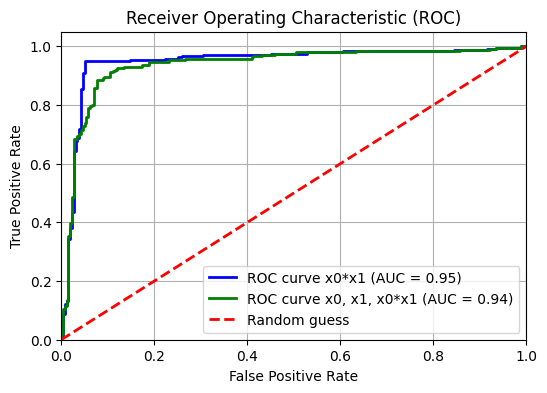

Much of the poor initial performance was due to the model only using a single feature. By adding capacity to handle multiple features (betas)
the model became somewhat better. However, the most significant improvement came from adding the interaction term
(x0 * x1) as a third feature. The model can now capture more complex relationships between the features and the target variable.
When also using the optimal threshold instead of the default 0.5, the accuracy improved somewhat more. Overall, these changes
led to a significant improvement in the model's performance. 

When further analyzing and only using the interaction term as a single feature, the model performed better than when using three features. 
This suggests that the x0 * x1 term is more informative than the others which have little predictive power on their own.


AI was used to help adapt the logistic regression class to handle multiple features and especially to debug the ROC curve calculation.

The inductive bias of the m

In [6]:
from sklearn.metrics import roc_curve, auc
from logistic_regression import LogisticRegression  # <--- use the updated class

# Load data
data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

# Prepare features and labels
X_train1 = train['x0'] * train['x1'] # Use interaction term as single feature
X_train2 = np.column_stack([train['x0'], train['x1'], train['x0'] * train['x1']]) # Pass interaction term as third feature, combines arrays to new 2D array
y_train = train['y']
X_test1 = test['x0'] * test['x1'] # Use interaction term as single feature
X_test2 = np.column_stack([test['x0'], test['x1'], test['x0'] * test['x1']])
y_test = test['y']

# Train model
logr1 = LogisticRegression()
logr1.fit(X_train1, y_train)

# Train model 2
logr2 = LogisticRegression()
logr2.fit(X_train2, y_train)

# Predict probabilities
predictions1 = logr1.predict(X_test1)
predictions2 = logr2.predict(X_test2)

# Find best threshold for accuracy by checking multiple thresholds.
thresholds1 = np.linspace(0, 1, 1000)
thresholds2 = np.linspace(0, 1, 1000)
best_acc1 = 0
best_acc2 = 0
best_thresh1 = 0.5
best_thresh2 = 0.5
for t in thresholds1:
	preds1 = (predictions1 >= t).astype(int)
	preds2 = (predictions2 >= t).astype(int)
	accuracy1 = np.mean(preds1 == y_test)
	accuracy2 = np.mean(preds2 == y_test)
	if accuracy1 > best_acc1:
		best_acc1 = accuracy1
		best_thresh1 = t
	if accuracy2 > best_acc2:
		best_acc2 = accuracy2
		best_thresh2 = t

print("Best threshold single feature (x0*x1):", best_thresh1)
print("Best accuracy single feature (x0*x1):", best_acc1)
print("Best threshold three features (x0, x1, x0*x1):", best_thresh2)
print("Best accuracy three features (x0, x1, x0*x1):", best_acc2)

# Use best threshold to make final predictions (0 or 1)
rounded_predictions1 = (predictions1 >= best_thresh1).astype(int)
rounded_predictions2 = (predictions2 >= best_thresh2).astype(int)

# ROC curve and AUC
fpr1, tpr1, thresholds1 = roc_curve(y_test, predictions1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, thresholds2 = roc_curve(y_test, predictions2)
roc_auc2 = auc(fpr2, tpr2)

plt.figure(figsize=(6, 4))
plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'ROC curve x0*x1 (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='green', lw=2, label=f'ROC curve x0, x1, x0*x1 (AUC = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("Much of the poor initial performance was due to the model only using a single feature. By adding capacity to handle multiple features (betas)\n"
	  "the model became somewhat better. However, the most significant improvement came from adding the interaction term\n"
		"(x0 * x1) as a third feature. The model can now capture more complex relationships between the features and the target variable.\n"
		"When also using the optimal threshold instead of the default 0.5, the accuracy improved somewhat more. Overall, these changes\n"
		"led to a significant improvement in the model's performance. \n\n"
		"When further analyzing and only using the interaction term as a single feature, the model performed better than when using three features. \n"
		"This suggests that the x0 * x1 term is more informative than the others which have little predictive power on their own.\n\n")

print("AI was used to help adapt the logistic regression class to handle multiple features and especially to debug the ROC curve calculation.\n")
print("The inductive bias of the model is that the model works by assuming that the output can be separated based on a linear relation in the data")

## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use binary encryption. We need a system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`. 

Only one of the data streams needs to be decrypted, but you will need to identify the correct one.

To decrypt a data stream, transform the data into a binary representation based on whether the feature is even or odd.

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

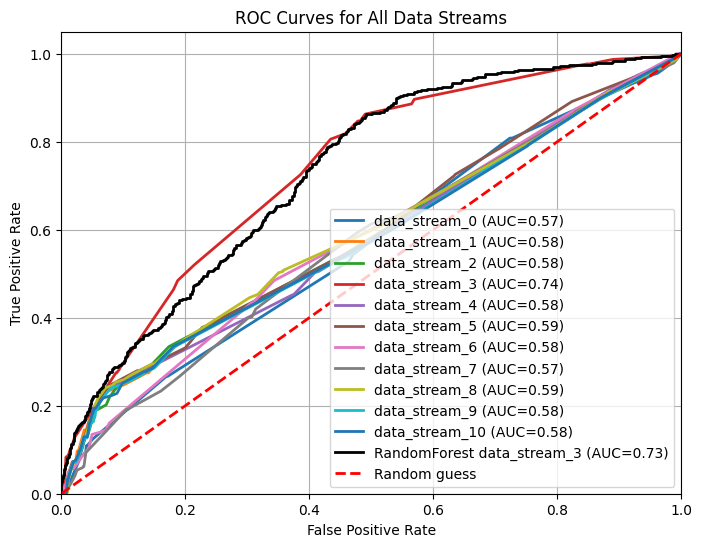

Best stream: data_stream_3 with ROC AUC = 0.737

Unique DT scores: 36
Unique RF scores: 2000
Top RF features: [('data_stream_7', np.float64(0.12435603547411136)), ('data_stream_0', np.float64(0.11604319382273674)), ('data_stream_6', np.float64(0.10981891510078624)), ('data_stream_2', np.float64(0.08564355953006887)), ('data_stream_8', np.float64(0.08505619217255479))]
Top permutation importance: [('data_stream_7', np.float64(0.016299999999999926)), ('data_stream_0', np.float64(0.010199999999999931)), ('data_stream_6', np.float64(0.007849999999999923)), ('data_stream_9', np.float64(-5.00000000000278e-05)), ('data_stream_5', np.float64(-0.0001000000000000445))]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load data
train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

X_train = train.drop(columns="target")
y_train = train['target']
X_test = test.drop(columns="target")
y_test = test['target']

# Initialize plot
plt.figure(figsize=(8, 6))
best_auc = 0
best_stream = None

# Hyperparameters
criterion = 'gini'
max_depth = 6

# Evaluate the trained model when decrypting each data stream one by one
for i in range(11):
    data_stream = f'data_stream_{i}'
    X_train_copy = X_train.copy()
    X_test_copy = X_test.copy()
    # Binary transformation
    X_train_copy[data_stream] = (X_train_copy[data_stream]*1000).astype(int) % 2
    X_test_copy[data_stream] = (X_test_copy[data_stream]*1000).astype(int) % 2

    tree = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, random_state=1)
    tree.fit(X_train_copy, y_train)
    predictions = tree.predict_proba(X_test_copy)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, predictions)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{data_stream} (AUC={roc_auc:.2f})')

    if roc_auc > best_auc:
        best_auc = roc_auc
        best_stream = data_stream

# Random Forest on the best stream found, added afterwards
rf_X_train = X_train.copy()
rf_X_test = X_test.copy()
rf_X_train[best_stream] = (rf_X_train[best_stream]*1000).astype(int) % 2
rf_X_test[best_stream] = (rf_X_test[best_stream]*1000).astype(int) % 2

rf = RandomForestClassifier(
    n_estimators=3000,
    max_depth=15,
    random_state=1,
    n_jobs=-1
)
rf.fit(rf_X_train, y_train)
rf_probs = rf.predict_proba(rf_X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, lw=2, color='black', label=f'RandomForest data_stream_3 (AUC={roc_auc_rf:.2f})')

# Finalize plot
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Data Streams')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"Best stream: {best_stream} with ROC AUC = {best_auc:.3f}")

print("")

Discussion:
Doing only a binary conversion of datastreams one by one gave no results so therefore i made a loop that tests the model when decrypting one stream at a time, thus finding which decryption of a stream gives a good model. Here we see that decrypting data stream 3 gives an area under curve that is significantly higher than the others.

The hyperparameters were tweaked to achive good results while decrypting stream 3 first, specifically the max depth of the decision tree. When going under 5 the tree would underfit while going over 7 the tree would overfit. 6 was best.

ROC AUC is good for evaluating in this case as it shows clearly which model has more true positives than false positives and it is good in separating the two classes. The AUC represents the probability that a randomly chosen positive sample gets a higher predicted score than a randomly chosen negative one. So 100% would be optimal.

A Random Forest Classifier doesn't improve at all.

## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the **Nexus Rating** of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 💡 Hint
You suspect that an insider has tampered with the columns in the testing data... 

Compare the training and test distributions and try to rectify the test dataset.

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [8]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

Text(0, 0.5, 'Count')

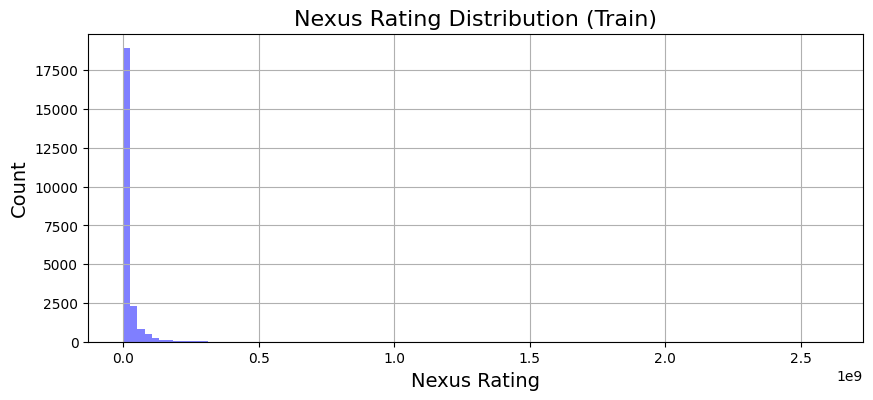

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
train['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon')
ax.set_title('Nexus Rating Distribution (Train)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

In [10]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [11]:
# Example rmsle check
test['pred'] = 0
print('RMSLE: ', rmsle(test['nexus_rating'], test['pred']))
print('Required RMSLE: ', 0.294)

RMSLE:  4.203250078450383
Required RMSLE:  0.294
